# Medicaid, drug spending

In [2]:
budgets = read.csv('budgets.csv', sep = ';', strip.white = TRUE)
drugs = read.csv('drug-spending.csv', sep = ';', strip.white = TRUE)

library(dplyr)
library(ggplot2)
library(repr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Get summaries for plots

In [5]:
amts = budgets %>%
    group_by(year) %>%
    summarise(medicaid_perc = sum(medicaid_total)/sum(all_spending_total)*100)
amts$medicaid_perc
amts

[1] 20.52279 21.94266 22.22471 23.80227 23.90511 24.32234 26.52106 27.93481
 [9] 28.70977 28.96512

year,medicaid_perc
2008,20.52279
2009,21.94266
2010,22.22471
2011,23.80227
2012,23.90511
2013,24.32234
2014,26.52106
2015,27.93481
2016,28.70977
2017,28.96512


In [4]:
totals = drugs %>%
    group_by(year) %>%
    summarise(total = sum(spending_less_rebates)/1000000000)
totals$total
totals

[1] 16.24908 16.29334 21.48478 21.66594 20.42738 19.66609 27.19969 31.58982
[9] 30.82381

year,total
2008,16.24908
2009,16.29334
2010,21.48478
2011,21.66594
2012,20.42738
2013,19.66609
2014,27.19969
2015,31.58982
2016,30.82381


In [10]:
df$drug_spending = df$drug_spending %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$drug_rebates = df$drug_rebates %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$spending_less_rebates = df$spending_less_rebates %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_state = df$medicaid_state %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_federal = df$medicaid_federal %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_total = df$medicaid_total %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$all_spending_state = df$all_spending_state %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$all_spending_federal = df$all_spending_federal %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$all_spending_total = df$all_spending_total %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$drugs_as_share_of_medicaid = df$drugs_as_share_of_medicaid %>% sub('\\%','',.) %>% as.character(.) %>% as.numeric(.)
df$medicaid_as_share_of_all_spending = df$medicaid_as_share_of_all_spending %>% sub('\\%','',.) %>% as.character(.) %>% as.numeric(.)

In [11]:
df$medicaid_percent_total = (df$medicaid_total / df$all_spending_tota) * 100 %>% round(., digits = 2)
df$medicaid_percent_state = (df$medicaid_state / df$all_spending_state) * 100 %>% round(., digits = 2)

In [4]:
head(df)

period_covered,st_abbreviation,st_name,drug_spending,drug_rebates,spending_less_rebates,medicaid_state,medicaid_federal,medicaid_total,all_spending_state,all_spending_federal,all_spending_total,drugs_as_share_of_medicaid,medicaid_as_share_of_all_spending,medicaid_percent_total,medicaid_percent_state
2016,AK,Alaska,108594349,-53673099,54921250,636190900,1066381900,1702572800,6754772879,3277197749,10031970628,3.23,16.97,16.97147,9.418391
2016,AL,Alabama,667346361,-391980305,275366056,1961000000,4393000000,6354000000,16203000000,9635000000,25838000000,4.33,24.59,24.59169,12.102697
2016,AR,Arkansas,339785707,-204345993,135439714,1478700000,5077000000,6555700000,16562824000,7397700000,23960524000,2.07,27.36,27.36042,8.927825
2016,AZ,Arizona,1246118344,-604294056,641824288,2831000000,8690000000,11521000000,25515000000,14167000000,39682000000,5.57,29.03,29.03331,11.095434
2016,CA,California,8004575487,-4277024489,3727550998,28323000000,53337000000,81660000000,160209000000,90690000000,250899000000,4.56,32.55,32.54696,17.678782
2016,CO,Colorado,908800937,-453282840,455518097,3603000000,5382000000,8985000000,27210000000,9517000000,36727000000,5.07,24.46,24.46429,13.241455


In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)

Total spending by state over time

In [6]:
temp = df %>%
    group_by(period_covered,st_abbreviation) %>%
    select(period_covered,st_abbreviation,medicaid_state) %>%
    filter(period_covered == 2006)

temp = temp[c(2:3)]
colnames(temp) = c('st_abbreviation', 'baseline')

df = full_join(df, temp, by = 'st_abbreviation')

In [7]:
df$pct_change_2006 = ((df$medicaid_state - df$baseline)/df$baseline)*100

avg_change = df %>% group_by(period_covered) %>% summarise(pct_change_2006 = mean(pct_change_2006, na.rm = TRUE))

Export national average data to JSON

In [12]:
medicaid_spending = df %>%
    group_by(period_covered) %>%
    summarise(total_medicaid = sum(medicaid_total),
              total_spending = sum(all_spending_total),
              mean_medicaid = mean(medicaid_total),
              mean_total_spending = mean(all_spending_total)) %>%
    mutate(total_medicaid_share = total_medicaid/total_spending*100,
           mean_medicaid_share = mean_medicaid/mean_total_spending*100)

In [13]:
medicaid_spending$total_spending

[1] 1.317742e+12 1.401696e+12 1.453533e+12 1.528926e+12 1.617120e+12
 [6] 1.672046e+12 1.635928e+12 1.670761e+12 1.733729e+12 1.844638e+12
[11] 1.885647e+12

In [11]:
library(rjson)

Let's graph medicaid as a share of all spending

What about average cost of drug spending?

In [138]:
temp = df %>%
    group_by(period_covered) %>%
    summarise(avg_drug_spending = mean(spending_less_rebates))

temp$avg_drug_spending/1000000

ERROR: Error in grouped_df_impl(data, unname(vars), drop): Column `period_covered` is unknown


# Lobbyists to legislators

In [160]:
df = read.csv('lobbyists-to-legislators.csv')
totals = read.csv('total-lobbyists.csv')

library(dplyr)
library(ggplot2)

In [16]:
head(df)

jurisdiction,year,annual_registrations,state_name,seats,registrations_to_legislators
AL,2016,33,ALABAMA,140,0.24
AL,2015,49,ALABAMA,140,0.35
AL,2014,51,ALABAMA,140,0.36
AL,2013,38,ALABAMA,140,0.27
AL,2012,41,ALABAMA,140,0.29
AL,2011,39,ALABAMA,140,0.28


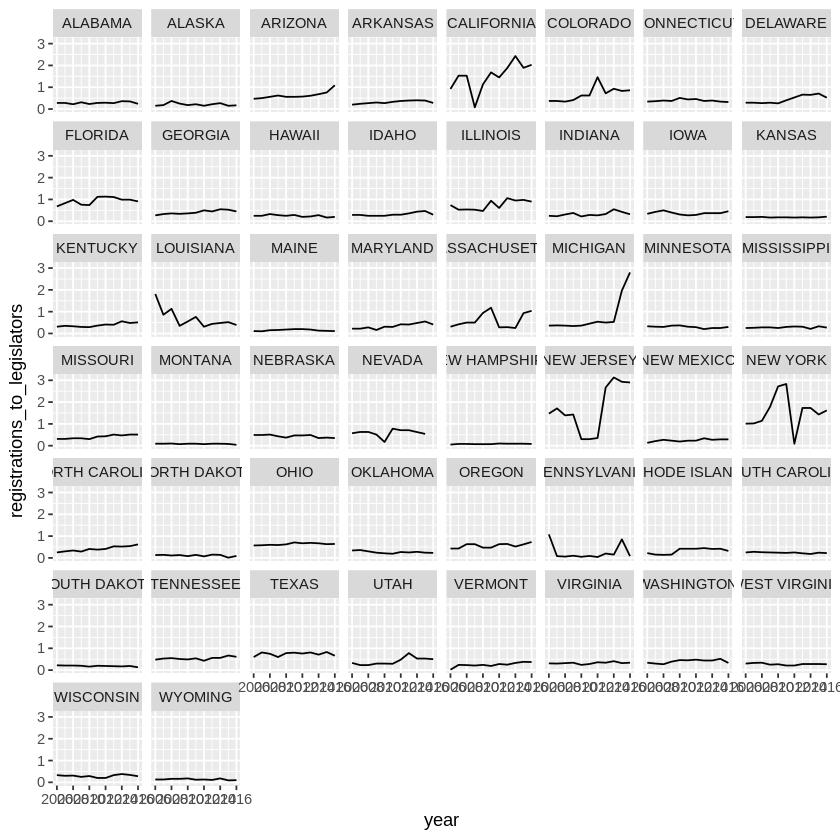

In [121]:
ggplot(df, aes(year, registrations_to_legislators)) + geom_line() + facet_wrap(~ state_name)

In [182]:
ratios = df %>%
    filter(year == 2016) %>%
    group_by(state_name, jurisdiction) %>%
    summarise(ratio = round(annual_registrations/seats*100))

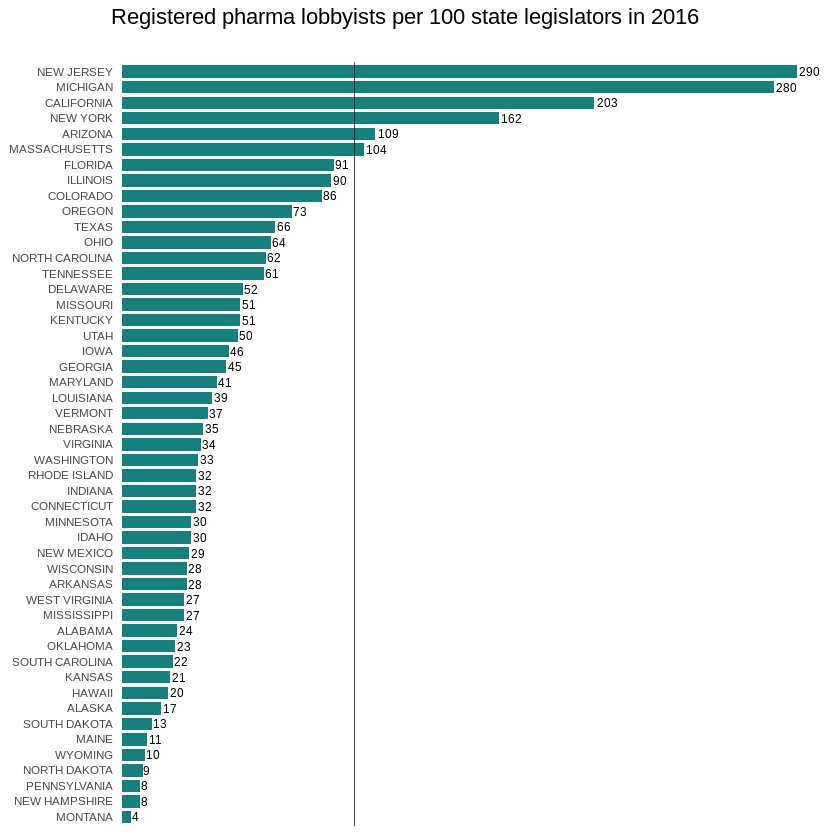

In [183]:
ggplot(ratios, aes(reorder(state_name,ratio), ratio)) +
    geom_col(width = 0.8, fill = '#17807E', position = position_dodge(width = 20)) +
    coord_flip() +
    ggtitle('Registered pharma lobbyists per 100 state legislators in 2016') +
    geom_text(aes(label = ratio, hjust = -.1), size = 2.5) +
    geom_abline(intercept = 100, slope = 0, size = .2) +
    theme(panel.grid.major = element_blank(),
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         legend.position = 'none',
         axis.title.y = element_blank(),
         axis.ticks.y = element_blank(),
         axis.text.y = element_text(size = 7, margin = margin(r = -18)),
         axis.ticks.x = element_blank(),
         axis.text.x = element_blank(),
         axis.title.x = element_blank(),
         plot.title = element_text(hjust = .15, margin = margin(b = 20)))

In [184]:
ratios = ratios %>% left_join(., totals, by = 'jurisdiction')

In [185]:
ratios$diff = ratios$count - ratios$ratio

In [187]:
ratios = ratios %>% select(c(1,3,5))

In [188]:
head(ratios)

state_name,ratio,diff
ALABAMA,24,1906
ALASKA,17,603
ARIZONA,109,14509
ARKANSAS,28,3407
CALIFORNIA,203,20343
COLORADO,86,3750


In [193]:
temp = gather(ratios, type, ratio, 2:3)

In [195]:
head(temp)

state_name,type,ratio
ALABAMA,ratio,24
ALASKA,ratio,17
ARIZONA,ratio,109
ARKANSAS,ratio,28
CALIFORNIA,ratio,203
COLORADO,ratio,86


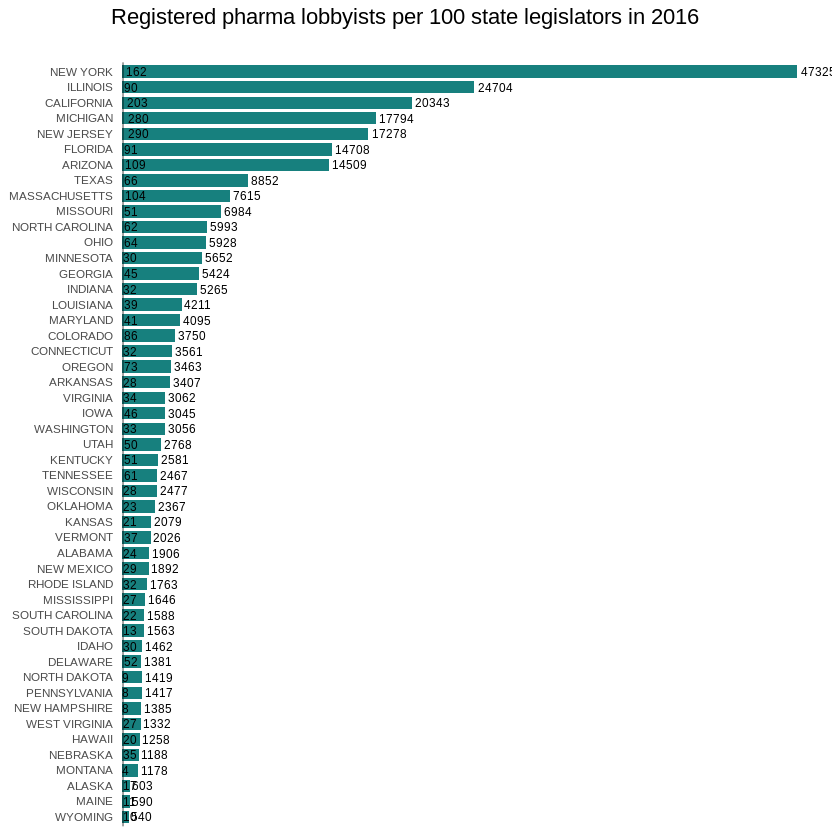

In [196]:
ggplot(temp, aes(reorder(state_name,ratio), ratio, fill = type)) +
    geom_col(width = 0.8, fill = '#17807E', position = position_dodge(width = 20)) +
    coord_flip() +
    ggtitle('Registered pharma lobbyists per 100 state legislators in 2016') +
    geom_text(aes(label = ratio, hjust = -.1), size = 2.5) +
    geom_abline(intercept = 100, slope = 0, size = .2) +
    theme(panel.grid.major = element_blank(),
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         legend.position = 'none',
         axis.title.y = element_blank(),
         axis.ticks.y = element_blank(),
         axis.text.y = element_text(size = 7, margin = margin(r = -18)),
         axis.ticks.x = element_blank(),
         axis.text.x = element_blank(),
         axis.title.x = element_blank(),
         plot.title = element_text(hjust = .15, margin = margin(b = 20)))